# Example 01: General Use of XGBoostFeatureSelector
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/feature_selection/example_01_XGBoostFeatureSelector.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.feature_selection import XGBoostFeatureSelector

_______
# XGBoostFeatureSelector Docstring

In [5]:
help(XGBoostFeatureSelector)

Help on class XGBoostFeatureSelector in module slickml.feature_selection:

class XGBoostFeatureSelector(builtins.object)
 |  XGBoostFeatureSelector(n_iter=None, num_boost_round=None, n_splits=None, metrics=None, early_stopping_rounds=None, random_state=None, stratified=True, shuffle=True, sparse_matrix=False, nth_noise_threshold=None, show_stdv=False, importance_type=None, params=None, verbose_eval=False, callbacks=False)
 |  
 |  XGBoost Feature Selector.
 |  This is wrapper using XGBoost classifier to run xgboost.cv()
 |  model with n-folds cross-validation on top of augmented data
 |  with noisy features iteratively. At each n-fold CV of each iteration,
 |  it finds the best boosting round to overcome the over-fitting and
 |  run xgboost.train(). Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html)
 |  
 |  Parameters
 |  ----------
 |  n_iter: int, optional (default=3)
 |      Number of iteration for feature selection
 |  
 |  

## Example 1

In [6]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [7]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [8]:
%autoreload
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

xfs = XGBoostFeatureSelector(n_iter=4,
                             sparse_matrix=True,
                             params=params)

In [9]:
# run feature selection
xfs.fit(X, y)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 1 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train AUC = 0.918 -- Test AUC = 0.860 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train AUC = 0.935 -- Test AUC = 0.874 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 3/4 -- Train AUC = 0.947 -- Test AUC = 0.788 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 4/4 -- Train AUC = 0.925 -- Test AUC = 0.874 *-*-*-*-*-*-*-*-*-*-*-*
*-*-* Internal 4-Folds CV: -*-*- Train AUC = 0.941 +/- 0.010 -*-*- Test AUC = 0.842 +/- 0.020 *-*-*
*-*-* External 4-Folds CV: -*-*- Train AUC = 0.931 +/- 0.011 -*-*- Test AUC = 0.849 +/- 0.036 *-*-*

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 2 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train AUC = 0.935 -- Test AUC = 0.827 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train AUC = 0.932 -- Test AUC = 0.847 *-*-*-*-*-*-*-*-*-*-*-*

In [11]:
# get feature freq
# or xfs.feature_frequency_ 
xfs.get_feature_frequency()

,Feature,Frequency,Frequency (%)
0,F1,16.0,100.00
1,F2,16.0,100.00
2,F5,16.0,100.00
3,F6,16.0,100.00
4,F3,13.0,81.25
5,F4,3.0,18.75


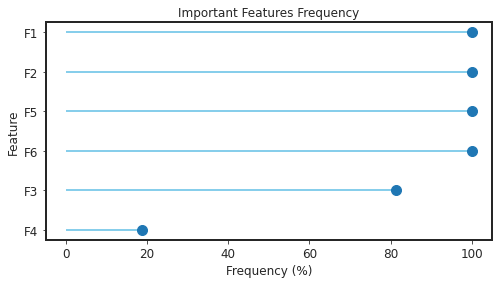

In [12]:
xfs.plot_frequency()

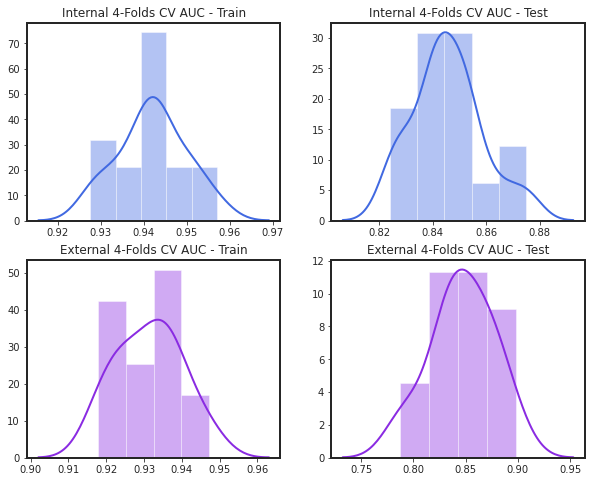

In [13]:
xfs.plot_cv_results()

In [14]:
# getting feature importance for each model
# or imps = xfs.feature_importance_
imps = xfs.get_feature_importance()
for key, val in imps.items():
    print(F"--- {key} ---")
    display(imps[key].head(5))

--- model_iter1_fold1 ---


,feature,total_gain
0,F1,756.907810
1,F6,455.236496
2,F2,283.091866
3,F5,197.914370
4,F3,39.327658


--- model_iter1_fold2 ---


,feature,total_gain
0,F1,782.958552
1,F2,375.976463
2,F6,367.191337
3,F5,328.392649
4,F3,134.776531


--- model_iter1_fold3 ---


,feature,total_gain
0,F1,1171.111478
1,F6,520.026925
2,F2,376.577674
3,F5,317.294273
4,F3,52.748300


--- model_iter1_fold4 ---


,feature,total_gain
0,F1,868.979814
1,F6,413.774690
2,F2,276.586677
3,F5,252.686966
4,noisy_F5,51.710637


--- model_iter2_fold1 ---


,feature,total_gain
0,F1,951.227652
1,F6,496.749164
2,F2,344.563351
3,F5,282.925956
4,noisy_F4,91.006061


--- model_iter2_fold2 ---


,feature,total_gain
0,F1,1061.838013
1,F5,373.111275
2,F6,349.380272
3,F2,214.764904
4,F3,105.755937


--- model_iter2_fold3 ---


,feature,total_gain
0,F1,823.941605
1,F6,514.014514
2,F2,359.767913
3,F5,291.577762
4,F3,70.684894


--- model_iter2_fold4 ---


,feature,total_gain
0,F1,961.967905
1,F6,586.434514
2,F2,398.154492
3,F5,231.963251
4,F3,86.918186


--- model_iter3_fold1 ---


,feature,total_gain
0,F1,710.693724
1,F6,430.175120
2,F2,407.537393
3,F5,298.385162
4,F3,31.529630


--- model_iter3_fold2 ---


,feature,total_gain
0,F1,1015.309067
1,F6,548.035278
2,F5,289.498879
3,F2,245.675640
4,F3,108.808759


--- model_iter3_fold3 ---


,feature,total_gain
0,F1,955.544828
1,F6,409.918644
2,F2,375.442440
3,F5,297.904244
4,noisy_F2,95.659890


--- model_iter3_fold4 ---


,feature,total_gain
0,F1,974.581450
1,F5,449.110998
2,F2,316.266789
3,F6,309.037805
4,F3,98.326847


--- model_iter4_fold1 ---


,feature,total_gain
0,F1,1109.999572
1,F5,441.975306
2,F6,380.028420
3,F2,286.344172
4,F3,49.575039


--- model_iter4_fold2 ---


,feature,total_gain
0,F1,1007.698952
1,F6,369.330940
2,F5,369.217129
3,F2,284.450654
4,F3,132.881183


--- model_iter4_fold3 ---


,feature,total_gain
0,F1,846.009801
1,F6,508.119591
2,F2,351.220945
3,F5,273.733060
4,F3,74.412856


--- model_iter4_fold4 ---


,feature,total_gain
0,F1,843.541872
1,F6,632.021277
2,F2,405.162897
3,F5,168.921846
4,F3,74.888881


In [15]:
# get cv results
# or xfs.cv_results_ 
xfs.get_cv_results()

,int_cv_train,int_cv_test,ext_cv_train,ext_cv_test
0,0.929796,0.842012,0.917812,0.860238
1,0.942211,0.828253,0.934678,0.873777
2,0.957021,0.874884,0.947256,0.787535
3,0.936404,0.824035,0.924914,0.874483
4,0.945188,0.865040,0.935365,0.826520
5,0.943959,0.852200,0.931939,0.846785
6,0.937604,0.837328,0.924509,0.884845
7,0.951573,0.854108,0.938191,0.852471
8,0.927594,0.841476,0.919579,0.824948
9,0.940829,0.841135,0.928061,0.839448
